In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



In [2]:
df = pd.read_csv("owid-covid-data.csv")

In [3]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70851 entries, 0 to 70850
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               70851 non-null  object 
 1   continent                              67325 non-null  object 
 2   location                               70851 non-null  object 
 3   date                                   70851 non-null  object 
 4   total_cases                            69938 non-null  float64
 5   new_cases                              69936 non-null  float64
 6   new_cases_smoothed                     68935 non-null  float64
 7   total_deaths                           60914 non-null  float64
 8   new_deaths                             61072 non-null  float64
 9   new_deaths_smoothed                    68935 non-null  float64
 10  total_cases_per_million                69555 non-null  float64
 11  ne

In [5]:
df = df.fillna(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70851 entries, 0 to 70850
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               70851 non-null  object 
 1   continent                              70851 non-null  object 
 2   location                               70851 non-null  object 
 3   date                                   70851 non-null  object 
 4   total_cases                            70851 non-null  float64
 5   new_cases                              70851 non-null  float64
 6   new_cases_smoothed                     70851 non-null  float64
 7   total_deaths                           70851 non-null  float64
 8   new_deaths                             70851 non-null  float64
 9   new_deaths_smoothed                    70851 non-null  float64
 10  total_cases_per_million                70851 non-null  float64
 11  ne

In [7]:
filter = df.new_cases > 0.0
df = df[filter]

In [8]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
8,AFG,Asia,Afghanistan,2020-03-03,2.0,1.0,0.143,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
9,AFG,Asia,Afghanistan,2020-03-04,4.0,2.0,0.429,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
13,AFG,Asia,Afghanistan,2020-03-08,5.0,1.0,0.571,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
14,AFG,Asia,Afghanistan,2020-03-09,7.0,2.0,0.857,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70846,ZWE,Africa,Zimbabwe,2021-02-19,35710.0,167.0,95.000,1430.0,10.0,5.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
70847,ZWE,Africa,Zimbabwe,2021-02-20,35768.0,58.0,94.857,1432.0,2.0,4.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
70848,ZWE,Africa,Zimbabwe,2021-02-21,35796.0,28.0,89.143,1436.0,4.0,5.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
70849,ZWE,Africa,Zimbabwe,2021-02-22,35862.0,66.0,91.429,1441.0,5.0,4.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


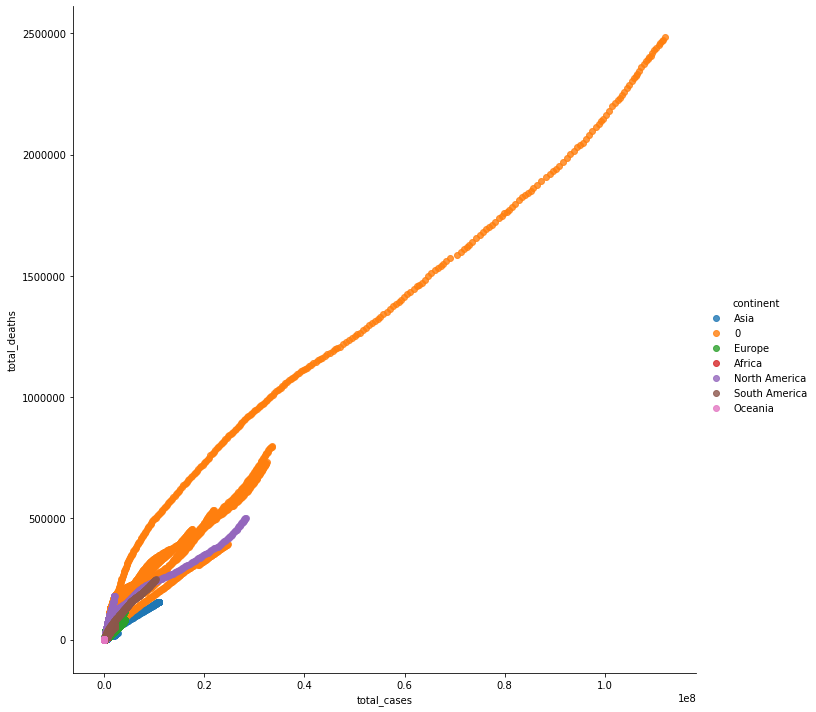

In [9]:
vis = sns.lmplot( data = df, x = 'total_cases', y = 'total_deaths', fit_reg = False, hue = 'continent', size = 10  )

In [10]:
df1 = df[df.continent == 0]

In [11]:
df1

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
367,OWID_AFR,0,Africa,2020-02-14,1.0,1.0,0.000,0.0,0.0,0.000,...,0.000,0.0,0.00,0.00,0.000,0.000,0.00,0.000,0.00,0.000
378,OWID_AFR,0,Africa,2020-02-25,2.0,1.0,0.143,0.0,0.0,0.000,...,0.000,0.0,0.00,0.00,0.000,0.000,0.00,0.000,0.00,0.000
381,OWID_AFR,0,Africa,2020-02-28,3.0,1.0,0.286,0.0,0.0,0.000,...,0.000,0.0,0.00,0.00,0.000,0.000,0.00,0.000,0.00,0.000
383,OWID_AFR,0,Africa,2020-03-01,4.0,1.0,0.429,0.0,0.0,0.000,...,0.000,0.0,0.00,0.00,0.000,0.000,0.00,0.000,0.00,0.000
384,OWID_AFR,0,Africa,2020-03-02,8.0,4.0,1.000,0.0,0.0,0.000,...,0.000,0.0,0.00,0.00,0.000,0.000,0.00,0.000,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69842,OWID_WRL,0,World,2021-02-19,110749144.0,439395.0,362599.286,2452744.0,11106.0,9629.143,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
69843,OWID_WRL,0,World,2021-02-20,111119409.0,370265.0,362215.286,2461259.0,8515.0,9450.286,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
69844,OWID_WRL,0,World,2021-02-21,111433102.0,313693.0,365088.000,2467139.0,5880.0,9390.714,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
69845,OWID_WRL,0,World,2021-02-22,111721889.0,288787.0,365862.143,2474178.0,7039.0,9412.143,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737


In [12]:
#continent with 0 values has no additional values 
df1.location.unique()

array(['Africa', 'Asia', 'Europe', 'European Union', 'International',
       'North America', 'Oceania', 'South America', 'World'], dtype=object)

In [13]:
#remove continent with 0 values 
filter2 = df.continent != 0
df = df[filter2]

In [14]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
8,AFG,Asia,Afghanistan,2020-03-03,2.0,1.0,0.143,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
9,AFG,Asia,Afghanistan,2020-03-04,4.0,2.0,0.429,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
13,AFG,Asia,Afghanistan,2020-03-08,5.0,1.0,0.571,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
14,AFG,Asia,Afghanistan,2020-03-09,7.0,2.0,0.857,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70846,ZWE,Africa,Zimbabwe,2021-02-19,35710.0,167.0,95.000,1430.0,10.0,5.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
70847,ZWE,Africa,Zimbabwe,2021-02-20,35768.0,58.0,94.857,1432.0,2.0,4.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
70848,ZWE,Africa,Zimbabwe,2021-02-21,35796.0,28.0,89.143,1436.0,4.0,5.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
70849,ZWE,Africa,Zimbabwe,2021-02-22,35862.0,66.0,91.429,1441.0,5.0,4.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


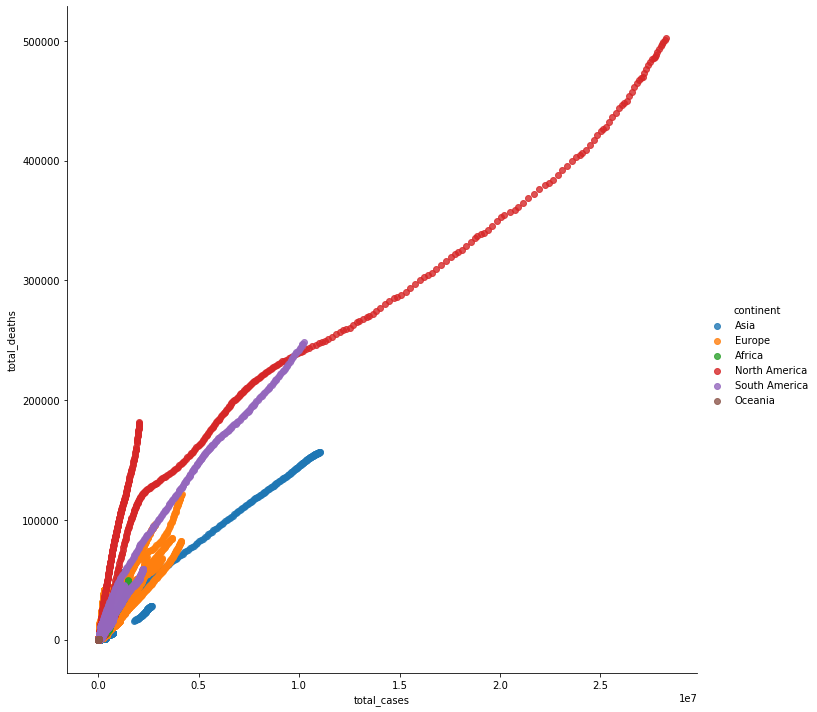

In [15]:
#North America has way more cases and deaths which is reasonable because of USA
#We can also see that there is no difference between both plots after removing continent with 0 values
vis2 = sns.lmplot( data = df, x = 'total_cases', y = 'total_deaths', fit_reg = False, hue = 'continent', size = 10  )

In [16]:
df = df.sort_values(by=('date'))

In [17]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
13455,CHN,Asia,China,2020-01-23,643.0,95.0,0.000,18.0,1.0,0.000,...,15308.712,0.7,261.899,9.74,1.9,48.4,0.000,4.34,76.91,0.761
56721,SGP,Asia,Singapore,2020-01-23,1.0,1.0,0.000,0.0,0.0,0.000,...,85535.383,0.0,92.243,10.99,5.2,28.3,0.000,2.40,83.62,0.938
69050,VNM,Asia,Vietnam,2020-01-23,2.0,2.0,0.000,0.0,0.0,0.000,...,6171.884,2.0,245.465,6.00,1.0,45.9,85.847,2.60,75.40,0.704
13456,CHN,Asia,China,2020-01-24,920.0,277.0,0.000,26.0,8.0,0.000,...,15308.712,0.7,261.899,9.74,1.9,48.4,0.000,4.34,76.91,0.761
23231,FRA,Europe,France,2020-01-24,2.0,2.0,0.000,0.0,0.0,0.000,...,38605.671,0.0,86.060,4.77,30.1,35.6,0.000,5.98,82.66,0.901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2951,ARG,South America,Argentina,2021-02-23,2077228.0,7477.0,6309.714,51510.0,151.0,154.000,...,18933.907,0.6,191.032,5.50,16.2,27.7,0.000,5.00,76.67,0.845
57118,SGP,Asia,Singapore,2021-02-23,59883.0,4.0,10.429,29.0,0.0,0.000,...,85535.383,0.0,92.243,10.99,5.2,28.3,0.000,2.40,83.62,0.938
28725,HUN,Europe,Hungary,2021-02-23,407274.0,1628.0,2521.714,14450.0,103.0,87.571,...,26777.561,0.5,278.296,7.55,26.8,34.8,0.000,7.02,76.88,0.854
8772,BIH,Europe,Bosnia and Herzegovina,2021-02-23,129176.0,515.0,394.714,5034.0,18.0,14.143,...,11713.895,0.2,329.635,10.08,30.2,47.7,97.164,3.50,77.40,0.780


In [18]:
firstreporteddayofcases = df[df.date == '2020-01-23'] 

In [19]:
#You can see the contradiction between total_cases & new_cases in China as it seems that they had already cases before they started reporting
firstreporteddayofcases

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
13455,CHN,Asia,China,2020-01-23,643.0,95.0,0.0,18.0,1.0,0.0,...,15308.712,0.7,261.899,9.74,1.9,48.4,0.000,4.34,76.91,0.761
56721,SGP,Asia,Singapore,2020-01-23,1.0,1.0,0.0,0.0,0.0,0.0,...,85535.383,0.0,92.243,10.99,5.2,28.3,0.000,2.40,83.62,0.938
69050,VNM,Asia,Vietnam,2020-01-23,2.0,2.0,0.0,0.0,0.0,0.0,...,6171.884,2.0,245.465,6.00,1.0,45.9,85.847,2.60,75.40,0.704


In [20]:
#Choose certain date 

CertainDatePatch = df[(df.date > '2021-02-19') & (df.date < '2021-02-23')]

In [21]:
CertainDatePatch

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
58721,ZAF,Africa,South Africa,2021-02-20,1502367.0,1690.0,1757.714,48940.0,81.0,159.857,...,12294.876,18.9,200.380,5.52,8.1,33.2,43.993,2.320,64.13,0.709
62823,TWN,Asia,Taiwan,2021-02-20,942.0,1.0,0.714,9.0,0.0,0.000,...,0.000,0.0,103.957,0.00,0.0,0.0,0.000,0.000,80.46,0.000
5896,BGD,Asia,Bangladesh,2021-02-20,543024.0,350.0,394.000,8342.0,5.0,10.857,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.800,72.59,0.632
52038,QAT,Asia,Qatar,2021-02-20,159967.0,449.0,451.857,256.0,0.0,0.143,...,116935.600,0.0,176.690,16.52,0.8,26.9,0.000,1.200,80.23,0.848
35701,LVA,Europe,Latvia,2021-02-20,81109.0,1069.0,689.571,1538.0,5.0,13.571,...,25063.846,0.7,350.060,4.91,25.6,51.0,0.000,5.570,75.29,0.866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19845,SLV,North America,El Salvador,2021-02-22,59235.0,689.0,173.143,1807.0,8.0,8.143,...,7292.458,2.2,167.295,8.87,2.5,18.8,90.650,1.300,73.32,0.673
19127,ECU,South America,Ecuador,2021-02-22,274968.0,295.0,1038.143,15547.0,11.0,27.429,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.500,77.01,0.759
40299,MLT,Europe,Malta,2021-02-22,21085.0,193.0,162.857,305.0,1.0,1.429,...,36513.323,0.2,168.711,8.83,20.9,30.2,0.000,4.485,82.53,0.895
65287,TUN,Africa,Tunisia,2021-02-22,228937.0,575.0,769.714,7811.0,18.0,33.714,...,10849.297,2.0,318.991,8.52,1.1,65.8,78.687,2.300,76.70,0.740


In [22]:
#Choose certain country 

Egyptpatch = df[df.location == 'Egypt']

In [23]:
Egyptpatch

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
19129,EGY,Africa,Egypt,2020-02-14,1.0,1.0,0.000,0.0,0.0,0.000,...,10550.206,1.3,525.432,17.31,0.2,50.1,89.827,1.6,71.99,0.707
19145,EGY,Africa,Egypt,2020-03-01,2.0,1.0,0.143,0.0,0.0,0.000,...,10550.206,1.3,525.432,17.31,0.2,50.1,89.827,1.6,71.99,0.707
19149,EGY,Africa,Egypt,2020-03-05,3.0,1.0,0.286,0.0,0.0,0.000,...,10550.206,1.3,525.432,17.31,0.2,50.1,89.827,1.6,71.99,0.707
19150,EGY,Africa,Egypt,2020-03-06,15.0,12.0,2.000,0.0,0.0,0.000,...,10550.206,1.3,525.432,17.31,0.2,50.1,89.827,1.6,71.99,0.707
19152,EGY,Africa,Egypt,2020-03-08,49.0,34.0,6.714,1.0,1.0,0.143,...,10550.206,1.3,525.432,17.31,0.2,50.1,89.827,1.6,71.99,0.707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19500,EGY,Africa,Egypt,2021-02-19,176943.0,610.0,620.143,10250.0,49.0,50.143,...,10550.206,1.3,525.432,17.31,0.2,50.1,89.827,1.6,71.99,0.707
19501,EGY,Africa,Egypt,2021-02-20,177543.0,600.0,620.143,10298.0,48.0,51.857,...,10550.206,1.3,525.432,17.31,0.2,50.1,89.827,1.6,71.99,0.707
19502,EGY,Africa,Egypt,2021-02-21,178151.0,608.0,619.714,10353.0,55.0,51.286,...,10550.206,1.3,525.432,17.31,0.2,50.1,89.827,1.6,71.99,0.707
19503,EGY,Africa,Egypt,2021-02-22,178774.0,623.0,621.143,10404.0,51.0,50.571,...,10550.206,1.3,525.432,17.31,0.2,50.1,89.827,1.6,71.99,0.707
